In [34]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2

In [35]:
PROBLEM = "detection"



In [36]:
#ANNOTATION_MODE = "C:/Users/fef/OneDrive - Ultranav/DTU/Semester 3/Deep Learning  - 02456/Project/train/train.json"
ANNOTATION_MODE = "coco"


In [37]:
INPUT_PATH = "C:/Users/fef/OneDrive - Ultranav/DTU/Semester 3/Deep Learning  - 02456/Project/train/Images_train"

In [38]:
OUTPUT_MODE = "coco"
OUTPUT_PATH= "C:/Users/fef/OneDrive - Ultranav/DTU/Semester 3/Deep Learning  - 02456/Project/aug2/"

GENERATION_MODE = "linear"

In [39]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})


In [40]:
# def boxesFromPascalVOC(labelPath):
#     tree = ET.parse(labelPath)
#     root = tree.getroot()
#     objects = root.findall('object')
#     if(len(objects)<1):
#         raise Exception("The xml should contain at least one object")
#     boxes = []
#     for object in objects:
#         category = object.find('name').text
#         bndbox = object.find('bndbox')
#         x  = float(bndbox.find('xmin').text)
#         y = float(bndbox.find('ymin').text)
#         h = float(bndbox.find('ymax').text)-y
#         w = float(bndbox.find('xmax').text) - x
#         boxes.append((category, (x, y, w, h)))
#     return boxes

In [41]:
# def showBoxes(image,boxes):
#     cloneImg = image.copy()
#     for box in boxes:
#         if(len(box)==2):
#             (category,(x,y,w,h)) = box
#         else:
#             (category,(x,y,w,h),_) = box
#         cv2.rectangle(cloneImg,(int(x),int(y)),(int(x+w),int(y+h)),(255,0,0),1)
#     plt.imshow(cloneImg[:,:,::-1])
    

In [42]:
# img = cv2.imread("C:/Users/fef/OneDrive - Ultranav/DTU/Semester 3/Deep Learning  - 02456/Project/voc/frame44FILE052.jpg")
# boxes = boxesFromPascalVOC("C:/Users/fef/OneDrive - Ultranav/DTU/Semester 3/Deep Learning  - 02456/Project/voc/frame44FILE052.xml")
# showBoxes(img,boxes)

In [43]:


transformer = transformerGenerator(PROBLEM)



# rotation
#for angle in [90,180]:
rotate = createTechnique("rotate", {"angle" : 270})
augmentor.addTransformer(transformer(rotate))

# flip
flip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(flip))


"""

# average blurring
t1 = createTechnique("average_blurring", {"kernel" : 5})
augmentor.addTransformer(transformer(t1))

# bilateral blurring
t2 = createTechnique("bilateral_blurring", {"diameter" : 11, "sigmaColor": 21, "sigmaSpace":7})
augmentor.addTransformer(transformer(t2))
"""

"""

# Blurring
t3 = createTechnique("blurring", {"ksize" : 5})
augmentor.addTransformer(transformer(t3))
"""


"""

# dropout : sets some pixels in the image to zero
t4 = createTechnique("dropout",{"percentage":0.05})
augmentor.addTransformer(transformer(t4))

# elastic deformation
t5 = createTechnique("elastic",{"alpha":5,"sigma":0.05})
augmentor.addTransformer(transformer(t5))

"""

"""

# equalize histogram
t6 = createTechnique("equalize_histogram",{})
augmentor.addTransformer(transformer(t6))


# gamma correction
t7 = createTechnique("gamma",{"gamma":1.5})
augmentor.addTransformer(transformer(t7))
"""

'''
# gaussian blurring
t8 = createTechnique("gaussian_blur", {"kernel" : 5})
augmentor.addTransformer(transformer(t8))

'''

# gaussian noise
t9 = createTechnique("gaussian_noise", {"mean" : 0,"sigma":10})
augmentor.addTransformer(transformer(t9))

"""

# raise saturation
t10 = createTechnique("raise_saturation", {"power" : 0.9})
augmentor.addTransformer(transformer(t10))

# sharpen
t11 = createTechnique("sharpen", {})
augmentor.addTransformer(transformer(t11))
"""


# invert
t12 = createTechnique("invert",{})
augmentor.addTransformer(transformer(t12))

"""
# keep original images
none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))
"""

augmentor.applyAugmentation()

In [44]:
import json
import cv2
from matplotlib import pyplot as plt

def getImageId(name,data):
    images = data['images']
    for image_data in images:
        if image_data['file_name']==name:
            return image_data['id']


        
def showBoxes(image_path,annotation_file):
    image = cv2.imread(image_path)
    with open(annotation_file) as f:
        data = json.load(f)
    image_id = getImageId(image_path[image_path.rfind('/')+1:],data)
    boxes = []
    for annot in data['annotations']:
        if annot['image_id']==image_id:
            boxes.append((annot['category_id'],annot['bbox']))
    categoriesData = data['categories']
    categories =  {cat['id']:cat['name'] for cat in categoriesData}
    cloneImg = image.copy()
    for box in boxes:
        (_,(x,y,w,h)) = box
        cv2.rectangle(cloneImg,(int(x),int(y)),(int(x+w),int(y+h)),(255,0,0),1)
    plt.imshow(cloneImg[:,:,::-1])

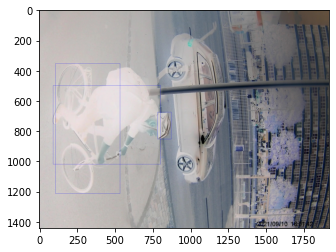

In [47]:
showBoxes('C:/Users/fef/OneDrive - Ultranav/DTU/Semester 3/Deep Learning  - 02456/Project/aug2/3_frame14304FILE050.jpg','C:/Users/fef/OneDrive - Ultranav/DTU/Semester 3/Deep Learning  - 02456/Project/aug2/annotation.json')